In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# pyber = pd.read_csv("data/city_data.csv")
pyber_ride = pd.read_csv("/Users/teresalee/Desktop/gitlab-data-analytics/02-Homework/05-Matplotlib/Solutions/Pyber/data/ride_data.csv")
pyber_city = pd.read_csv("/Users/teresalee/Desktop/gitlab-data-analytics/02-Homework/05-Matplotlib/Solutions/Pyber/data/city_data.csv")

In [4]:
pyber_ride.head()
# pyber_ride.shape

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
pyber_city.head()
# pyber_city.shape

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
city_rider_data = pd.merge(pyber_city, pyber_ride, how="outer", on="city")

In [7]:
city_rider_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
avg_cr_data = city_rider_data.groupby('city').fare.mean()
total_rc_data = city_rider_data.groupby('city').ride_id.count()
total_dc_data = city_rider_data.groupby('city').driver_count.sum()
city_type = city_rider_data['type'].value_counts()

In [9]:
#avg fare per city
city_fare_summary = pd.DataFrame({"avg fare by city": avg_cr_data})
city_fare_summary.head()

,avg fare by city
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [10]:
# total number of riders per city
total_rc_data.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [11]:
# total number of drivers per city
total_dc_data.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [12]:
# city type
city_type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [21]:
# % of Total Fares by City Type
fare_sum = city_rider_data["fare"].sum()
total_cr_data = city_rider_data.groupby('type').fare.sum()
perc_total_fare = total_cr_data/fare_sum
perc_total_fare*100

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

Text(0.5,1,'% of Total Fares by City Type')

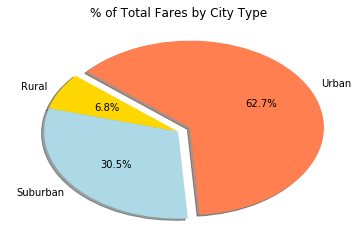

In [14]:
c_types = ["Rural", "Suburban", "Urban"]
fare_by_city_type = [6.81, 30.46, 62.72]
colors = ["gold","lightblue","coral"]
explode = [0,0,.1]
plt.pie(fare_by_city_type, explode=explode, labels=c_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

In [27]:
# % Total Rides by City Type
rides_sum = city_rider_data['type'].count()
rides_c_data = city_rider_data.groupby('type').fare.count()
perc_r_data = rides_c_data/rides_sum
perc_r_data*100

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: fare, dtype: float64

Text(0.5,1,'% of Total Rides by City Type')

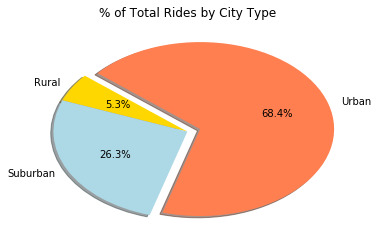

In [16]:
plt.pie(perc_r_data, explode=explode, labels=c_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

In [17]:
# % of Total Drivers by City Type
drivers_sum = city_rider_data['driver_count'].sum()
driver_c_data = city_rider_data.groupby('type').driver_count.sum()
driver_c_data2 = driver_c_data/drivers_sum
driver_c_data2*100

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

Text(0.5,1,'% of Total Drivers by City Type')

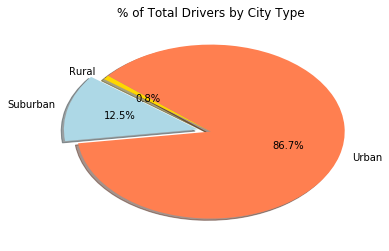

In [18]:
driver_by_city_type = [.79, 12.48, 86.75]
explode = [0,.1,0]
plt.pie(driver_by_city_type, explode=explode, labels=c_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

In [28]:
new_df = pd.DataFrame({"avg fare": fare_by_city_type, "driver count/city": driver_c_data, "riders count":city_type})
new_df

,avg fare,driver count/city,riders count
Rural,6.81,537,125
Suburban,30.46,8570,625
Urban,62.72,59602,1625


Text(0,0.5,'Average Fare $ Per Rider')

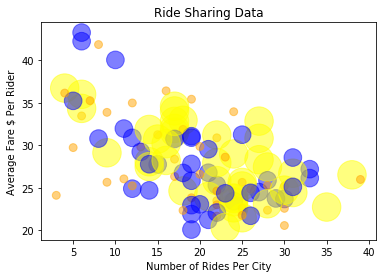

In [45]:
avg_fare = avg_cr_data
total_riders = total_rc_data
cities = city_type
colors = ["yellow", "blue", "orange"]
plt.scatter(total_rc_data,
           avg_cr_data, s=.5*cities, c=colors,
           linewidths=1, marker="o",
           alpha=0.5, label="Urban")
plt.title("Ride Sharing Data")
plt.xlabel("Number of Rides Per City")
plt.ylabel("Average Fare $ Per Rider")

Analysis: 
    1) 63& of rides are from Urban cities
    2) Rural and subarban areas only make up 30% of all the rides; can promote more in those cities
    